In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Frequency Domain Analysis - Resizing

Remember, we already did this using operation in the spatial domain (interpolation methods)? Now let's do the same thing using frequency domain analysis.

In [1]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-yfdjwtux
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2311 sha256=6d45eb24cfcb99469fc9635125b250825f2c74eca08c12eabfa569a12cc0b640
  Stored in directory: /tmp/pip-ephem-wheel-cache-l2ja4pev/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-yfdjwtux


In [2]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=3, task_no=1) # download data for this assignment

Download Complete!


In [3]:
def resize_ft(img, k=1):
    '''
    Write a program to resize the given image by a factor 'k' using frequency domain analysis.
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
        - use int(k*input_image_size) to find the nearest integer
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
              - range should be between (0, 255) which may not be the case when u run the inverse DFT. 
              - Therefore, normalise the image by img = (img - min(img))/max(img) to rescale the values to (0, 255)
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hints:
    + For upscaling - pad the frquency domain signal with zeros around the center of the image. 
    + For downscaling - crop the frequency domain signal at the centre of required size.
    + PS - Make sure to use proper shift operation on output of cv2.dft so that your frequency domain signal 
         - assumes the centre of the image to be origin
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    H, W = img.shape

    dft_img = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift_img = np.fft.fftshift(dft_img)

    if k == 1.0:
      out_img = np.copy(img).astype(np.uint8)
    elif k < 1.0:
      h_low, h_high = int((1-k) * H / 2), int((1+k) * H / 2)
      w_low, w_high = int((1-k) * W / 2), int((1+k) * W / 2)
      out_img = dft_shift_img[h_low:h_high, w_low:w_high]
    else:
      pad_width = int((k-1) * H / 2)
      out_img = np.zeros((2*pad_width + H, 2*pad_width + W, 2))
      out_img[:,:,0] = np.pad(dft_shift_img[:,:,0], pad_width = pad_width, mode='constant')
      out_img[:,:,1] = np.pad(dft_shift_img[:,:,1], pad_width = pad_width, mode='constant')

    out_img = np.fft.ifftshift(out_img)
    out_img = cv2.idft(out_img)
    out_img = cv2.magnitude(out_img[:,:,0], out_img[:,:,1])
    out_img = cv2.normalize(out_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Observations

Original


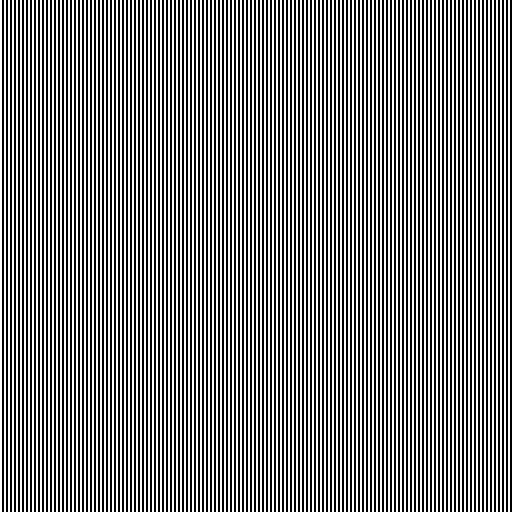

 k = 0.49


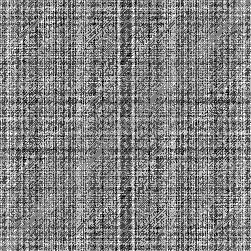

 k = 0.5


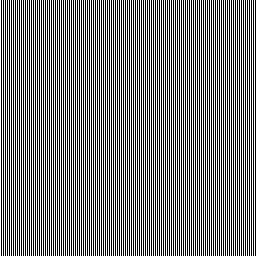

 k = 0.51


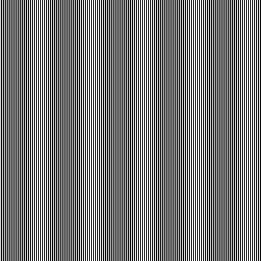

 k = 1.96


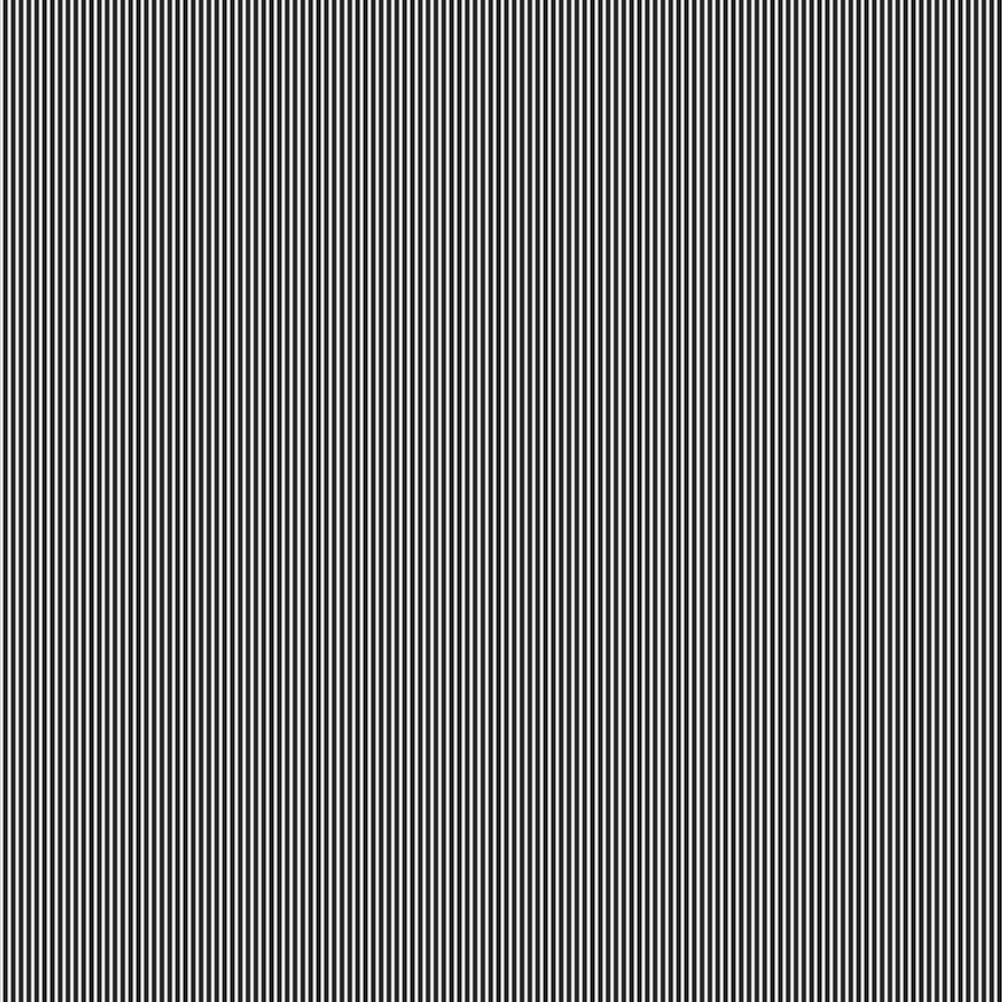

 k = 2


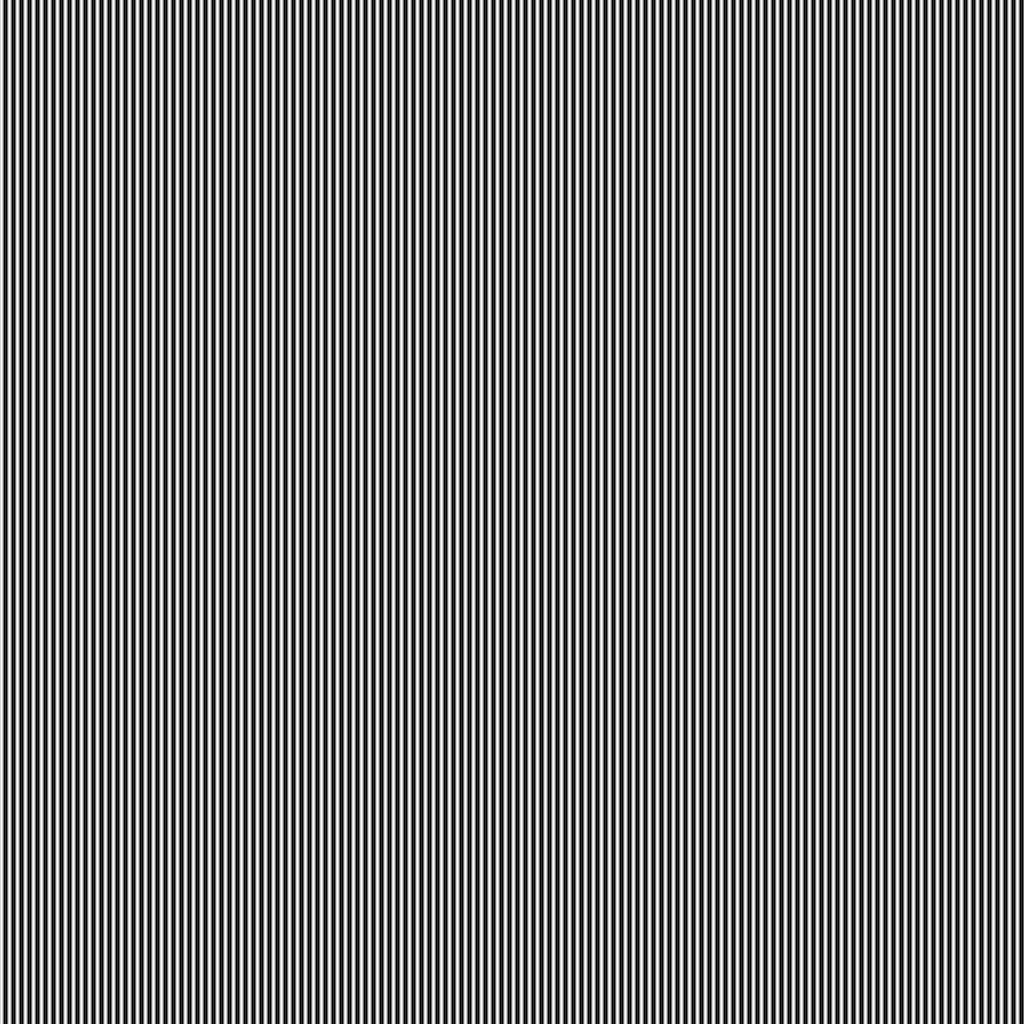

 k = 2.04


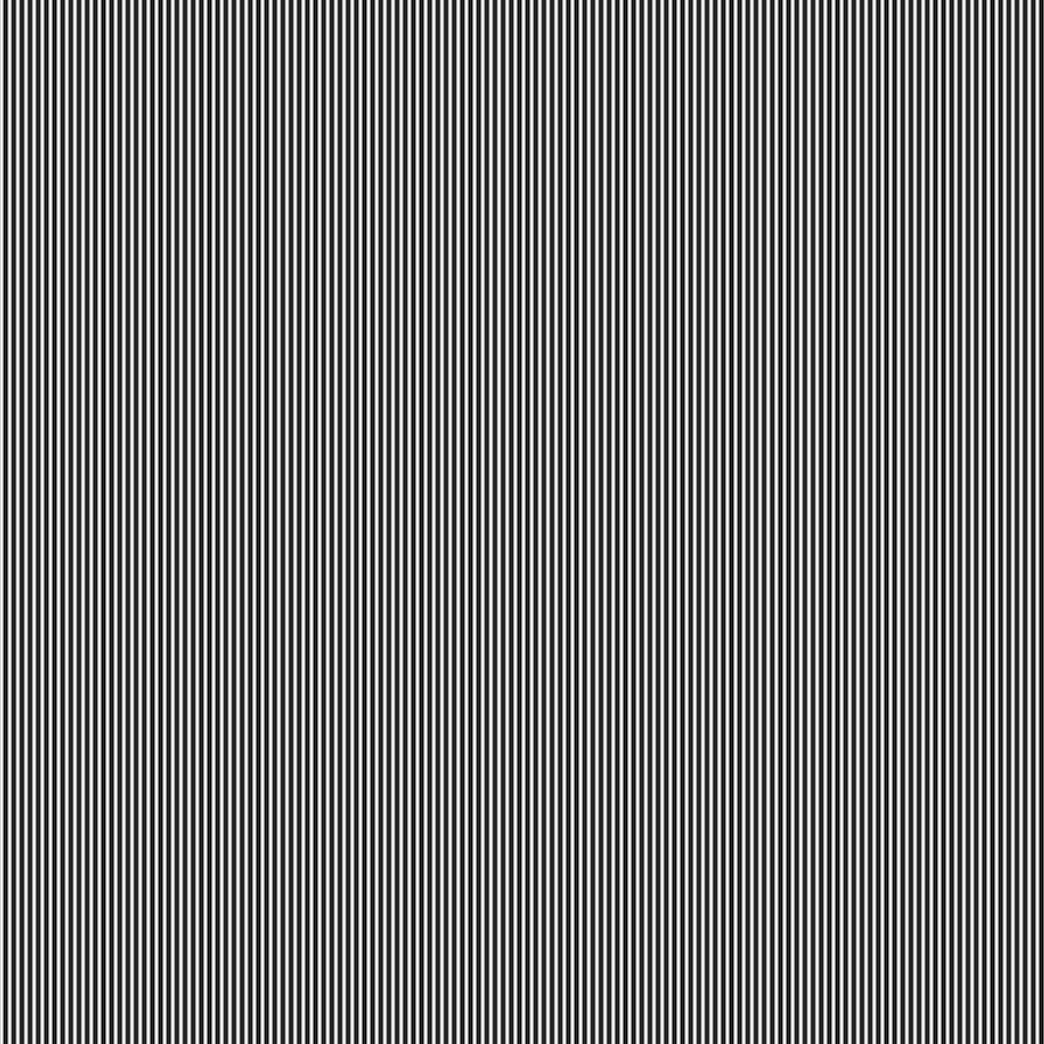

In [4]:
# Do not change codes inside this cell
# Add your observations in next cell
# Your observation should compare the output for different values of k

data = cv2.imread("data/parallel_lines.jpg", 0)

print("Original")
cv2_imshow(data)

for k in [0.49, 0.5, 0.51, 1.96, 2, 2.04]:
    tmp = resize_ft(data, k=k)
    print(" k = " + str(k))
    cv2_imshow(tmp)

In [5]:
your_observation = """
From the images we can infer that:
1. For undersampling as we sample less than the half of the spectrum we start loosing information about the spectrum due to aliasing.

2. Fourier domain sampling provides better results than spatial operations.
"""

print(your_observation)


From the images we can infer that:
1. For undersampling as we sample less than the half of the spectrum we start loosing information about the spectrum due to aliasing.

2. Fourier domain sampling provides better results than spatial operations.



In [6]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

gen_imgs = []
data = cv2.imread("data/parallel_lines.jpg", 0)

for k in [0.49, 0.5, 0.51, 1.96, 2, 2.04]:
    tmp = resize_ft(data, k=k)
    gen_imgs.append(tmp)

task1_submission = np.array(gen_imgs)